#### <span style="color:#grey"> __Formation South Green 2022 - Structural Variants Detection by using short and long reads__ </span>

# <span style="color:#006E7F">  <center> __DAY 2 : How to analyze mapping results ?__ </center> </span>

Created by C. Tranchant (DIADE-IRD), J. Orjuela (DIADE-IRD), F. Sabot (DIADE-IRD) and A. Dereeper (PHIM-IRD)

***

# <span style="color: #006E7F">Table of contents</span>
<a class="anchor" id="home"></a>

[I - Get some basic mapping stats with samtools flagstat](#mappingstats)

* [Run samtools flagstat](#flagstat)
* [Samtools flagstat output](#flagstatoutput)
* [Merge individual flagstat files into an unique file with python code](#multiflagstat) 
* [Plot mapping ratio per sample](#ratioplot)
* [EXERCICE : DO THE SAME MANIP WITH MINIMAP2 RESULTS](#minimap)

</span>

***



## <span style="color:#006E7F">__I - Get some basic mapping stats with samtools flagstat__ <a class="anchor" id="mappingstats"></span>  

### <span style="color: #4CACBC;"> First go into the directory that contains all the bam files</span>  

As we will mainly launch python code to analyse mapping results, the kernel of this jupyter book is Python3. So we are going to add `%` to execute some specific linux commands or `%%bash`  to execute any linux command.

In [1]:
%cd /home/jovyan/work/MAPPING-ILL/
%ls

/home/jovyan/work/MAPPING-ILL
BAM/         dirClone12/  dirClone16/  dirClone2/   dirClone5/  dirClone9/
dirClone1/   dirClone13/  dirClone17/  dirClone20/  dirClone6/
dirClone10/  dirClone14/  dirClone18/  dirClone3/   dirClone7/
dirClone11/  dirClone15/  dirClone19/  dirClone4/   dirClone8/


### <span style="color: #4CACBC;">Grouping the flagstat files previosly created</span>  

* Create the subdirectory FLAGSTAT into the directory MAPPING_ILL
* copy the flagstat files previously generated into this new directry

In [2]:
%%bash
pwd
mkdir -p FLAGSTAT
cp dir*/*flagstat FLAGSTAT

/home/jovyan/work/MAPPING-ILL


#### <span style="color: #4CACBC;">Check that the flagstat files have been correctly copied</span>

In [3]:
ls FLAGSTAT

Clone10.flagstat  Clone15.flagstat  Clone1.flagstat   Clone5.flagstat
Clone11.flagstat  Clone16.flagstat  Clone20.flagstat  Clone6.flagstat
Clone12.flagstat  Clone17.flagstat  Clone2.flagstat   Clone7.flagstat
Clone13.flagstat  Clone18.flagstat  Clone3.flagstat   Clone8.flagstat
Clone14.flagstat  Clone19.flagstat  Clone4.flagstat   Clone9.flagstat


### <span style="color: #4CACBC;">Let's look the content of one flagstat file <a class="anchor" id="flagstatoutput"></span> 

In [4]:
cat FLAGSTAT/Clone10*stat

296107 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 duplicates
221301 + 0 mapped (74.74%:-nan%)
296107 + 0 paired in sequencing
148037 + 0 read1
148070 + 0 read2
218229 + 0 properly paired (73.70%:-nan%)
219681 + 0 with itself and mate mapped
1620 + 0 singletons (0.55%:-nan%)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


### <span style="color: #4CACBC;">Merge individual flagstat files into an unique file with python code <a class="anchor" id="multiflagstat"></span> 

In [5]:
# IMPORT PYTHON PACKAGE USED BY THE CODE
import os
import pandas as pd

# VARIABLE INITIALIZATION

## NAME OF THE DIRECTORY THAT CONTAINS FLAGSTAT FILES
flagstat_dir = "/home/jovyan/work/MAPPING-ILL/FLAGSTAT" #PUT THE DIRECTORY NAME THAT CONTAINS FLAGSTAT FILES 

## NAME OF THE FILE THAT WILL CONTAIN ALL THE FLAGSTAT RESULTATS
stat_file = f"{flagstat_dir}/all_stat.csv"

# PRINT THE CONTENT OF 2 PREVIOUS VARIABLES INITIALIZED
print("DIRECTORY : ",flagstat_dir)
print("FINAL STAT FILE : ",stat_file)


DIRECTORY :  /home/jovyan/work/MAPPING-ILL/FLAGSTAT
FINAL STAT FILE :  /home/jovyan/work/MAPPING-ILL/FLAGSTAT/all_stat.csv


In [6]:
%pwd

'/home/jovyan/work/MAPPING-ILL'

In [7]:
# OPEN THE FINAL FILE IN WHICH WE PRINT SOME STATS EXTRACTED FROM EACH INDIVIDUAL FILE GENERATED BY SAMTOOLS FLAGSTAT
with open(stat_file, 'w') as stat: 
    # WRITE A HEADER LINE IN OUR STAT FILE
    header_line = "sample,mapped,paired,unmapped"
    stat.write(header_line)
    
    # READING EACH FILE OF THE FLGSTAT DIRECTORY
    for file in os.listdir(flagstat_dir):
        # If flagstat is in name of file
        filen = flagstat_dir + "/" + file
        if "flagstat" in file:
            # Extract sample name and save into a new variable newLine 
            new_line = f"\n{file.split('.')[0]},"
            # OPEN AND READS FLAGSTAT FILE
            with open(filen, "r") as flagstat:
                # read file line by line
                for line in flagstat:
                    # remove the line skipper at the endo of the line
                    line = line.rstrip()              
                    # Keep only line mapped, paired or singleton word
                    if 'mapped (' in line or 'paired (' in line or 'singleton' in line:
                        # get percentage value and save it into the varaible called perc
                        perc = f"{line.split('(')[1].split('%')[0]}"
                        new_line += f"{perc},"
                # WRITE THE LINE ONCE THE FLAGSTAT FILE COMPLETELY READ
                stat.write(new_line.strip(","))

### <span style="color: #4CACBC;">Display the content of the final stat file  <a class="anchor" id="statfile"></span> 

In [8]:
%cat $stat_file

sample,mapped,paired,unmapped
Clone9,80.41,79.70,0.49
Clone1,100.00,100.00,0.00
Clone20,76.84,72.97,0.53
Clone6,85.92,85.49,0.41
Clone3,100.00,100.00,0.00
Clone16,75.52,66.81,0.43
Clone7,65.75,64.94,0.77
Clone2,100.00,100.00,0.00
Clone10,74.74,73.70,0.55
Clone15,73.85,68.41,0.50
Clone17,76.06,72.69,0.52
Clone19,74.50,71.10,0.52
Clone12,73.02,71.07,0.58
Clone18,72.39,69.05,0.50
Clone5,89.23,89.00,0.22
Clone11,75.20,73.85,0.53
Clone13,78.18,75.93,0.53
Clone4,99.56,99.53,0.01
Clone14,78.03,74.84,0.55
Clone8,49.62,48.40,1.14

### <span style="color: #4CACBC;">Plot mapping ratio per sample <a class="anchor" id="ratioplot"></a></span> 

#### Load csv file into a panda datafrale


In [9]:
df_bam_stat = pd.read_csv(stat_file, index_col=False, sep=",")
df_bam_stat

,sample,mapped,paired,unmapped
0,Clone9,80.41,79.70,0.49
1,Clone1,100.00,100.00,0.00
2,Clone20,76.84,72.97,0.53
3,Clone6,85.92,85.49,0.41
4,Clone3,100.00,100.00,0.00
5,Clone16,75.52,66.81,0.43
6,Clone7,65.75,64.94,0.77
7,Clone2,100.00,100.00,0.00
8,Clone10,74.74,73.70,0.55
9,Clone15,73.85,68.41,0.50


#### Basic stats

In [13]:
# Je n'affiche que les valeurs de la colonne "mapped"
print(df_bam_stat['mapped'])

0      80.41
1     100.00
2      76.84
3      85.92
4     100.00
5      75.52
6      65.75
7     100.00
8      74.74
9      73.85
10     76.06
11     74.50
12     73.02
13     72.39
14     89.23
15     75.20
16     78.18
17     99.56
18     78.03
19     49.62
Name: mapped, dtype: float64


In [14]:
# J affiche la moyenne, min et max de cette colonne
minimum = df_bam_stat["mapped"].min()
maximun = df_bam_stat["mapped"].max()
mean_flag = df_bam_stat["mapped"].mean()

print("\n######## BASIC STATS\n MAPPED")       
print(f"\t%min : {minimum}\t %max : {maximun}\t %mean : {mean_flag}")



######## BASIC STATS
 MAPPED
	%min : 49.62	 %max : 100.0	 %mean : 79.941


#### Sort by clone name

In [11]:
df_bam_stat_sorted=df_bam_stat.sort_values(by=['sample'])
df_bam_stat_sorted

,sample,mapped,paired,unmapped
1,Clone1,100.00,100.00,0.00
8,Clone10,74.74,73.70,0.55
15,Clone11,75.20,73.85,0.53
12,Clone12,73.02,71.07,0.58
16,Clone13,78.18,75.93,0.53
18,Clone14,78.03,74.84,0.55
9,Clone15,73.85,68.41,0.50
5,Clone16,75.52,66.81,0.43
10,Clone17,76.06,72.69,0.52
13,Clone18,72.39,69.05,0.50


#### Your first plot with python

<AxesSubplot:xlabel='sample', ylabel='paired'>

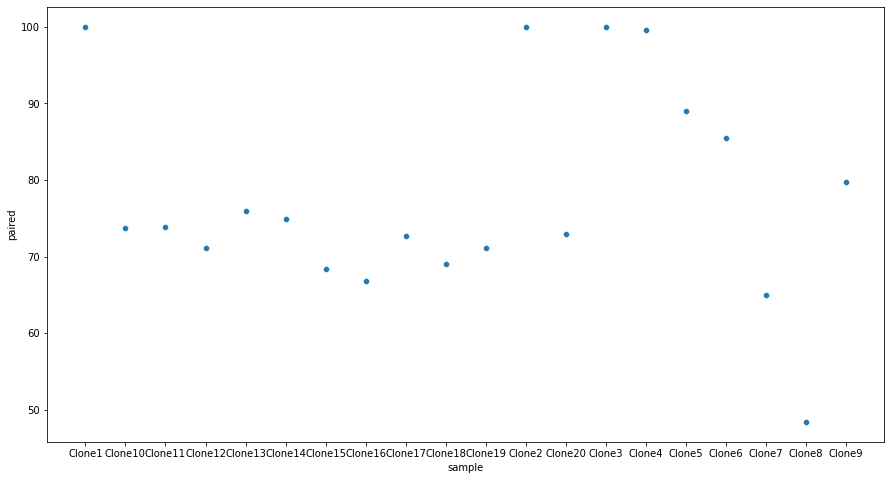

In [15]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))
sns.scatterplot(x="sample",y="paired", data=df_bam_stat_sorted)

Text(0, 0.5, 'Mapping percentage')

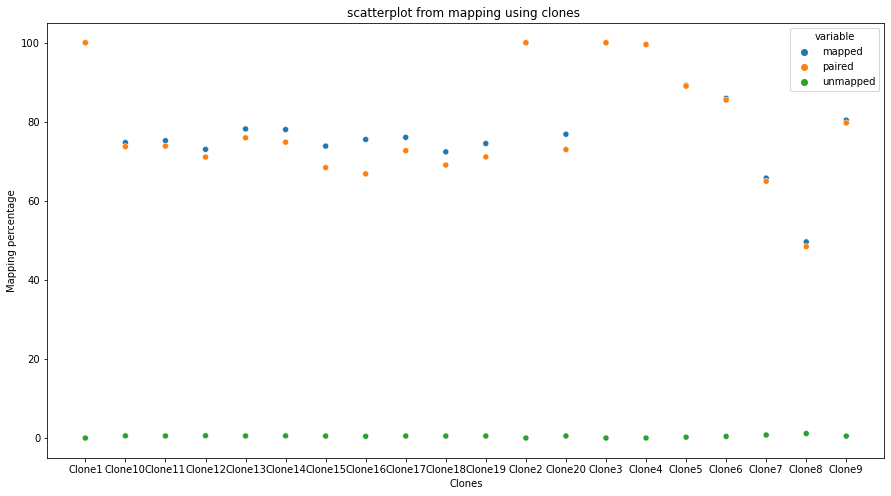

In [17]:
# Plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,8))
ax=sns.scatterplot(x="sample",y="value", hue='variable', data=pd.melt(df_bam_stat_sorted, 'sample'))
ax.set_title("scatterplot from mapping using clones ")
ax.set_xlabel("Clones")
ax.set_ylabel("Mapping percentage")

### <span style="color: #4CACBC;"> EXERCICE : DO THE SAME THING WITH MINIMAP2 RESULTS <a class="anchor" id="minimap"></span> 